In [1]:
# IML - Project 2 - Q2.c,d,e
# (Antoine Debor & Jan Held, November 2020)

# Run the entire notebook to obtain the figures presented in the report (and additional ones)

from sklearn.linear_model import LinearRegression
import numpy as np
np.random.seed(0)

In [2]:
nb_samples = 10000
nb_x = 200
nb_LS = 1000
LS_size = 30

mu_e, sigma_e = 0, np.sqrt(0.1)

In [3]:
def f(x):
    """ function to approximate """
    return -x**3+3*x**2-2*x+1

Hb & RESIDUAL ERROR

In [4]:
x_0 = np.arange(0,2,2/nb_x)
h_b = np.array([])
fun = f(x_0)

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Creation of multiple y values by using the formula y = f(x) + mu_e where mu_e∼ N (0, sigma_e^2)
samples_tot = []
for x in x_0:
    samples = []
    for i in np.arange(nb_samples):
        samples.append((f(x)+ np.random.normal(mu_e, sigma_e),x))
    samples_tot.append(samples)    

In [7]:
for sample in samples_tot:
    sample = np.asarray(sample)
    h_b = np.append(h_b, np.mean(sample[:,0])) 

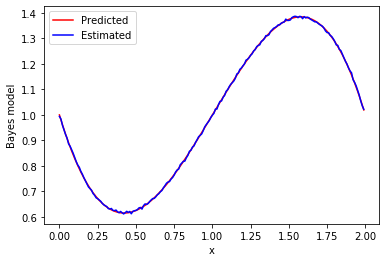

In [8]:
# Estimated and predicted Bayes model
plt.plot(x_0, fun, 'r', label="Predicted")
plt.plot(x_0, h_b, 'b', label="Estimated")
plt.ylabel("Bayes model")
plt.xlabel("x")
plt.legend()
plt.show()

In [9]:
# Residual error
resid_error = np.array([])
for sample in samples_tot:
    temp = np.asarray(sample)[:,0] - h_b[samples_tot.index(sample)]
    resid_error = np.append(resid_error, np.mean(temp**2))

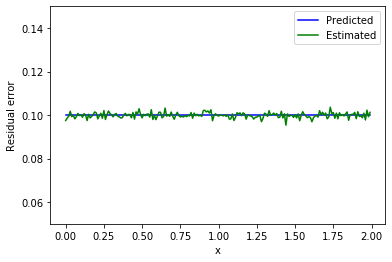

In [10]:
# Estimated and predicted residual error
plt.plot(x_0, np.full(nb_x, sigma_e**2), 'b', label="Predicted")
plt.plot(x_0, resid_error, 'g', label="Estimated")
plt.ylabel("Residual error")
plt.xlabel("x")
plt.ylim((0.05, 0.15))
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression 
import random 
random.seed(0)

SQUARED BIAS 

In [12]:
# Generation of the LS by using the formula y = f(x) + mu_e where mu_e∼ N (0, sigma_e^2) and x∼ U(0, 2).
LS = []
for j in np.arange(nb_LS):
    LS_j = []
    for k in range(LS_size):
        x = random.uniform(0, 2)
        LS_j.append((f(x)+ np.random.normal(mu_e, sigma_e),x))
    LS.append(LS_j)    

In [13]:
unit_vect = np.ones(LS_size)

In [14]:
# Creation of different candidate models of increasing degrees 0 ≤ m ≤ 5 
# m=0 
models_0 = []
for LS_j in LS:
    LS_j = np.asarray(LS_j)
    model = LinearRegression(fit_intercept=0).fit(X=unit_vect.reshape(-1,1),y=LS_j[:,0].reshape(-1,1))
    models_0.append(model)

In [15]:
# m=1 
models_1 = []
for LS_j in LS:
    LS_j = np.asarray(LS_j)
    X = np.stack((unit_vect, LS_j[:,1]), axis=1)
    model = LinearRegression(fit_intercept=0).fit(X,y=LS_j[:,0].reshape(-1,1))
    models_1.append(model)

In [16]:
# m=2 
models_2 = []
for LS_j in LS:
    LS_j = np.asarray(LS_j)
    X = np.stack((unit_vect, LS_j[:,1], LS_j[:,1]**2), axis=1)
    model = LinearRegression(fit_intercept=0).fit(X,y=LS_j[:,0])
    models_2.append(model)

In [17]:
# m=3
models_3 = []
for LS_j in LS:
    LS_j = np.asarray(LS_j)
    X = np.stack((unit_vect, LS_j[:,1] , LS_j[:,1]**2, LS_j[:,1]**3), axis=1)
    model = LinearRegression(fit_intercept=0).fit(X,y=LS_j[:,0])
    models_3.append(model)

In [18]:
# m=4 
models_4 = []
for LS_j in LS:
    LS_j = np.asarray(LS_j)
    X = np.stack((unit_vect, LS_j[:,1] , LS_j[:,1]**2, LS_j[:,1]**3, LS_j[:,1]**4), axis=1)
    model = LinearRegression(fit_intercept=0).fit(X,y=LS_j[:,0])
    models_4.append(model)

In [19]:
# m=5 
models_5 = []
for LS_j in LS:
    LS_j = np.asarray(LS_j)
    X = np.stack((unit_vect, LS_j[:,1] , LS_j[:,1]**2, LS_j[:,1]**3, LS_j[:,1]**4, LS_j[:,1]**5), axis=1)
    model = LinearRegression(fit_intercept=0).fit(X,y=LS_j[:,0])
    models_5.append(model)

In [20]:
unit_vect_bis = np.ones(nb_x)

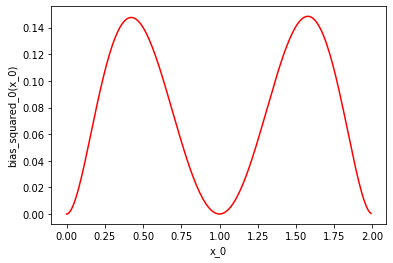

In [21]:
# Computation of the squared bias for the different candidate models
# m = 0
y_hat = np.zeros((nb_x,1))
for model in models_0:
    y_hat = y_hat + model.predict(unit_vect_bis.reshape(-1,1))
y_hat_avg_0 = y_hat/nb_LS

bias_squared_0 = fun-y_hat_avg_0.transpose()
bias_squared_0 = (bias_squared_0.reshape(np.size(bias_squared_0)))**2

plt.plot(x_0, bias_squared_0, 'r')
plt.xlabel('x_0')
plt.ylabel('bias_squared_0(x_0)')
plt.show()

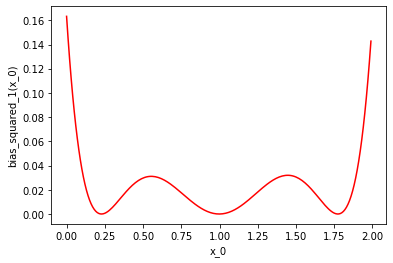

In [22]:
# m = 1
y_hat = np.zeros((nb_x,1))
for model in models_1:
    y_hat = y_hat + model.predict(np.stack((unit_vect_bis, x_0), axis=1))
y_hat_avg_1 = y_hat/nb_LS

bias_squared_1 = fun-y_hat_avg_1.transpose()
bias_squared_1 = (bias_squared_1.reshape(np.size(bias_squared_1)))**2

plt.plot(x_0, bias_squared_1, 'r')
plt.xlabel('x_0')
plt.ylabel('bias_squared_1(x_0)')
plt.show()

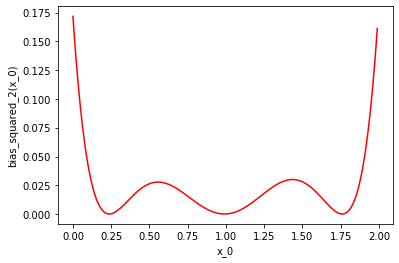

In [23]:
# m = 2
y_hat = np.zeros((nb_x,1))
for model in models_2:
    y_hat = y_hat + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2), axis=1))).reshape((nb_x,1))
y_hat_avg_2 = y_hat/nb_LS

bias_squared_2 = fun-y_hat_avg_2.transpose()
bias_squared_2 = (bias_squared_2.reshape(np.size(bias_squared_2)))**2

plt.plot(x_0, bias_squared_2, 'r')
plt.xlabel('x_0')
plt.ylabel('bias_squared_2(x_0)')
plt.show()

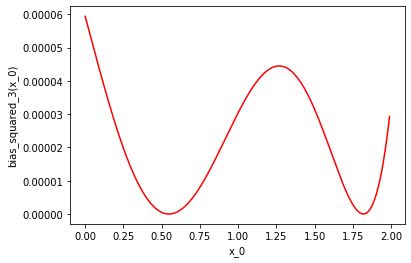

In [24]:
# m = 3
y_hat = np.zeros((nb_x,1))
for model in models_3:
    y_hat = y_hat + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3), axis=1))).reshape((nb_x,1))
y_hat_avg_3 = y_hat/nb_LS

bias_squared_3 = fun-y_hat_avg_3.transpose()
bias_squared_3 = (bias_squared_3.reshape(np.size(bias_squared_3)))**2

plt.plot(x_0, bias_squared_3, 'r')
plt.xlabel('x_0')
plt.ylabel('bias_squared_3(x_0)')
plt.show()

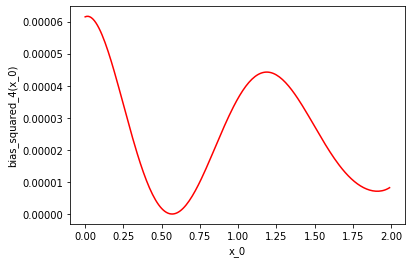

In [25]:
# m = 4
y_hat = np.zeros((nb_x,1))
for model in models_4:
    y_hat = y_hat + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3, x_0**4), axis=1))).reshape((nb_x,1))
y_hat_avg_4 = y_hat/nb_LS

bias_squared_4 = fun-y_hat_avg_4.transpose()
bias_squared_4 = (bias_squared_4.reshape(np.size(bias_squared_4)))**2

plt.plot(x_0, bias_squared_4, 'r')
plt.xlabel('x_0')
plt.ylabel('bias_squared_4(x_0)')
plt.show()

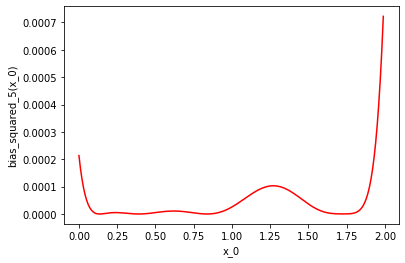

In [26]:
# m = 5
y_hat = np.zeros((nb_x,1))
for model in models_5:
    y_hat = y_hat + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3, x_0**4, x_0**5), axis=1))).reshape((nb_x,1))
y_hat_avg_5 = y_hat/nb_LS

bias_squared_5 = fun-y_hat_avg_5.transpose()
bias_squared_5 = (bias_squared_5.reshape(np.size(bias_squared_5)))**2

plt.plot(x_0, bias_squared_5, 'r')
plt.xlabel('x_0')
plt.ylabel('bias_squared_5(x_0)')
plt.show()

VARIANCE

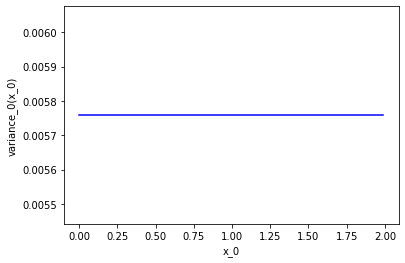

In [27]:
# Computation of the variance for the different candidate models
# m = 0
arg = np.zeros((nb_x,1))
for model in models_0:
    arg = arg + (model.predict(unit_vect_bis.reshape(-1,1)) - y_hat_avg_0)**2
var_0 = arg/nb_LS
plt.plot(x_0, var_0, 'b')
plt.ylabel('variance_0(x_0)') 
plt.xlabel('x_0')
plt.show()

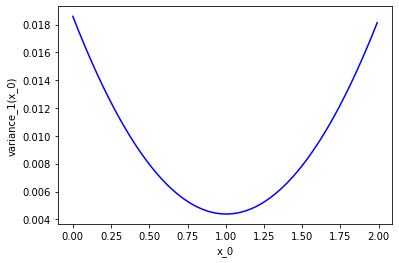

In [28]:
# m = 1
arg = np.zeros((nb_x,1))
for model in models_1:
    arg = arg + (model.predict(np.stack((unit_vect_bis, x_0), axis=1)) - y_hat_avg_1)**2
var_1 = arg/nb_LS
plt.plot(x_0, var_1, 'b')
plt.ylabel('variance_1(x_0)') 
plt.xlabel('x_0')
plt.show()

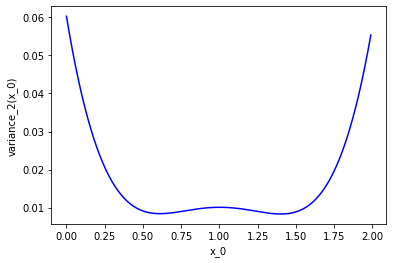

In [29]:
# m = 2
arg = np.zeros((nb_x,1))
for model in models_2:
    arg = arg + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2), axis=1)).reshape((nb_x,1)) - y_hat_avg_2)**2
var_2 = arg/nb_LS
plt.plot(x_0, var_2, 'b')
plt.ylabel('variance_2(x_0)') 
plt.xlabel('x_0')
plt.show()

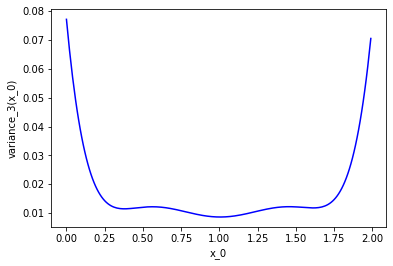

In [30]:
# m = 3
arg = np.zeros((nb_x,1))
for model in models_3:
    arg = arg + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3), axis=1)).reshape((nb_x,1)) - y_hat_avg_3)**2
var_3 = arg/nb_LS
plt.plot(x_0, var_3, 'b')
plt.ylabel('variance_3(x_0)') 
plt.xlabel('x_0')
plt.show()

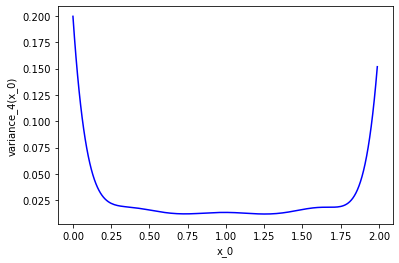

In [31]:
# m = 4
arg = np.zeros((nb_x,1))
for model in models_4:
    arg = arg + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3, x_0**4), axis=1)).reshape((nb_x,1)) - y_hat_avg_4)**2
var_4 = arg/nb_LS
plt.plot(x_0, var_4, 'b')
plt.ylabel('variance_4(x_0)') 
plt.xlabel('x_0')
plt.show()

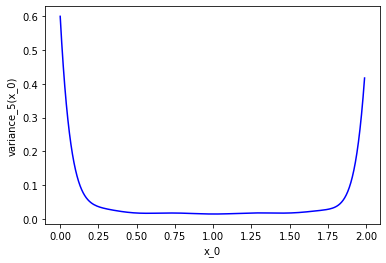

In [32]:
# m = 5
arg = np.zeros((nb_x,1))
for model in models_5:
    arg = arg + (model.predict(np.stack((unit_vect_bis, x_0, x_0**2, x_0**3, x_0**4, x_0**5), axis=1)).reshape((nb_x,1)) - y_hat_avg_5)**2
var_5 = arg/nb_LS
plt.plot(x_0, var_5, 'b')
plt.ylabel('variance_5(x_0)') 
plt.xlabel('x_0')
plt.show()

EXPECTED ERROR

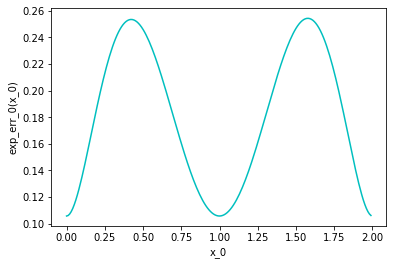

In [33]:
# Computation of the expected error for the different candidate models
# m = 0
exp_err_0 = sigma_e**2 + bias_squared_0 + var_0.reshape(nb_x)
plt.plot(x_0, exp_err_0, 'c')
plt.ylabel('exp_err_0(x_0)')
plt.xlabel('x_0')
plt.show()

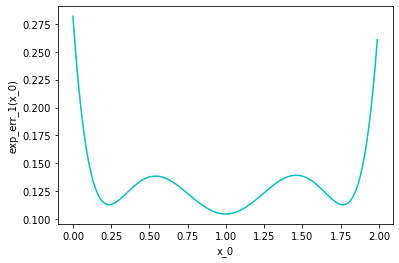

In [34]:
# m = 1
exp_err_1 = sigma_e**2 + bias_squared_1 + var_1.reshape(nb_x)
plt.plot(x_0, exp_err_1, 'c')
plt.ylabel('exp_err_1(x_0)')
plt.xlabel('x_0')
plt.show()

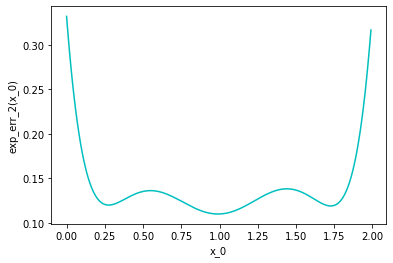

In [35]:
# m = 2
exp_err_2 = sigma_e**2 + bias_squared_2 + var_2.reshape(nb_x)
plt.plot(x_0, exp_err_2, 'c')
plt.ylabel('exp_err_2(x_0)')
plt.xlabel('x_0')
plt.show()

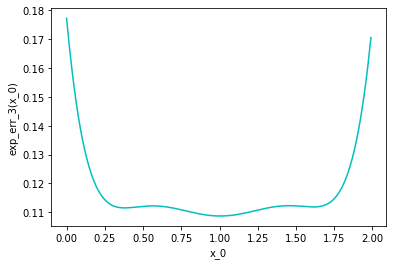

In [36]:
# m = 3
exp_err_3 = sigma_e**2 + bias_squared_3 + var_3.reshape(nb_x)
plt.plot(x_0, exp_err_3, 'c')
plt.ylabel('exp_err_3(x_0)')
plt.xlabel('x_0')
plt.show()

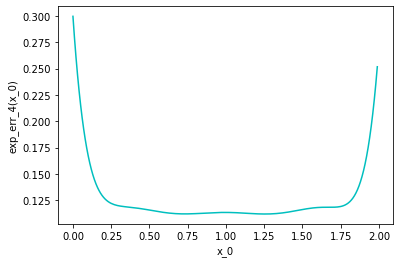

In [37]:
# m = 4
exp_err_4 = sigma_e**2 + bias_squared_4 + var_4.reshape(nb_x)
plt.plot(x_0, exp_err_4, 'c')
plt.ylabel('exp_err_4(x_0)')
plt.xlabel('x_0')
plt.show()

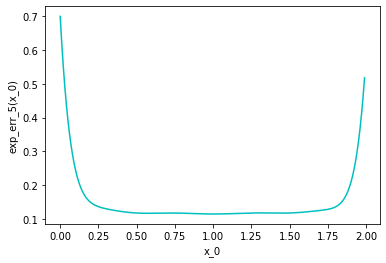

In [38]:
# m = 5
exp_err_5 = sigma_e**2 + bias_squared_5 + var_5.reshape(nb_x)
plt.plot(x_0, exp_err_5, 'c')
plt.ylabel('exp_err_5(x_0)')
plt.xlabel('x_0')
plt.show()

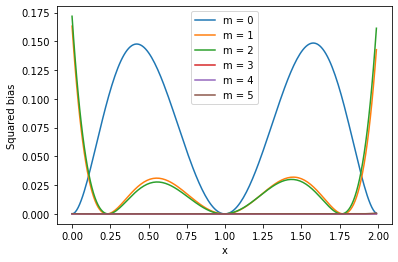

In [39]:
# Plot of the estimated squared bias for the different candidate models on the same plot
plt.plot(x_0, bias_squared_0, label="m = 0")
plt.plot(x_0, bias_squared_1, label="m = 1")
plt.plot(x_0, bias_squared_2, label="m = 2")
plt.plot(x_0, bias_squared_3, label="m = 3")
plt.plot(x_0, bias_squared_4, label="m = 4")
plt.plot(x_0, bias_squared_5, label="m = 5")
plt.ylabel('Squared bias')
plt.xlabel('x')
plt.legend()
plt.show()

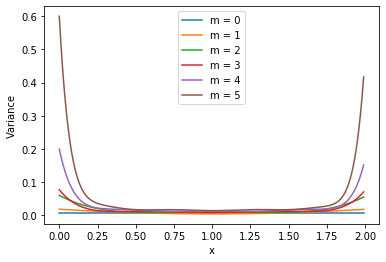

In [40]:
# Plot of the estimated variance for the different candidate models on the same plot
plt.plot(x_0, var_0, label="m = 0")
plt.plot(x_0, var_1, label="m = 1")
plt.plot(x_0, var_2, label="m = 2")
plt.plot(x_0, var_3, label="m = 3")
plt.plot(x_0, var_4, label="m = 4")
plt.plot(x_0, var_5, label="m = 5")
plt.ylabel('Variance')
plt.xlabel('x')
plt.legend()
plt.show()

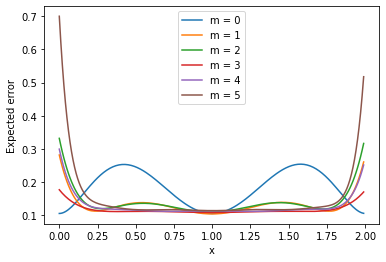

In [41]:
# Plot of the estimated expected error for the different candidate models on the same plot
plt.plot(x_0, exp_err_0, label="m = 0")
plt.plot(x_0, exp_err_1, label="m = 1")
plt.plot(x_0, exp_err_2, label="m = 2")
plt.plot(x_0, exp_err_3, label="m = 3")
plt.plot(x_0, exp_err_4, label="m = 4")
plt.plot(x_0, exp_err_5, label="m = 5")
plt.ylabel('Expected error')
plt.xlabel('x')
plt.legend()
plt.show()

MEAN QUANTITIES

In [42]:
mean_h_b = np.mean(h_b)
mean_resid_error = np.mean(resid_error)

# Mean estimated squared bias for the different candidate models
mean_sq_bias = np.zeros(6)
mean_sq_bias[0] = np.mean(bias_squared_0)
mean_sq_bias[1] = np.mean(bias_squared_1)
mean_sq_bias[2] = np.mean(bias_squared_2)
mean_sq_bias[3] = np.mean(bias_squared_3)
mean_sq_bias[4] = np.mean(bias_squared_4)
mean_sq_bias[5] = np.mean(bias_squared_5)

# Mean estimated variance for the different candidate models
mean_var = np.zeros(6)
mean_var[0] = np.mean(var_0)
mean_var[1] = np.mean(var_1)
mean_var[2] = np.mean(var_2)
mean_var[3] = np.mean(var_3)
mean_var[4] = np.mean(var_4)
mean_var[5] = np.mean(var_5)

# Mean estimated expected error for the different candidate models
mean_exp_err = np.zeros(6)
mean_exp_err[0] = np.mean(exp_err_0)
mean_exp_err[1] = np.mean(exp_err_1)
mean_exp_err[2] = np.mean(exp_err_2)
mean_exp_err[3] = np.mean(exp_err_3)
mean_exp_err[4] = np.mean(exp_err_4)
mean_exp_err[5] = np.mean(exp_err_5)

In [43]:
deg = range(6)

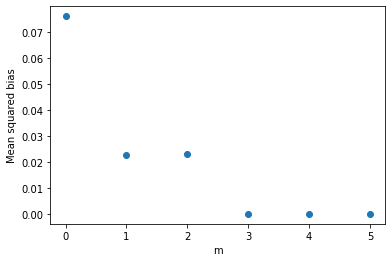

In [44]:
plt.plot(deg, mean_sq_bias, 'o')
plt.xlabel("m")
plt.ylabel("Mean squared bias")
plt.show()

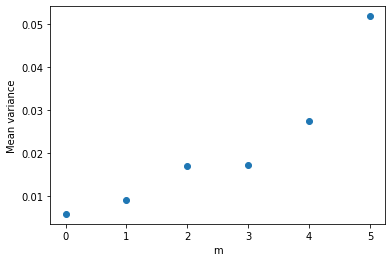

In [45]:
plt.plot(deg, mean_var, 'o')
plt.xlabel("m")
plt.ylabel("Mean variance")
plt.show()

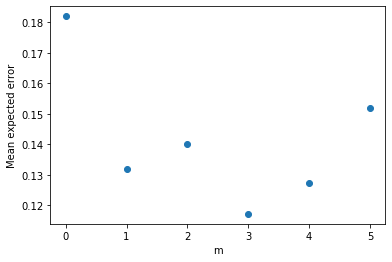

In [46]:
plt.plot(deg, mean_exp_err, 'o')
plt.xlabel("m")
plt.ylabel("Mean expected error")
plt.show()

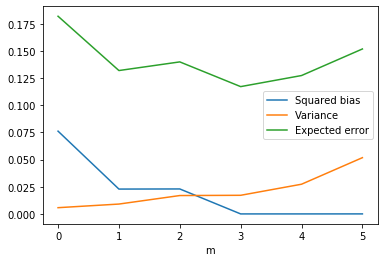

In [47]:
plt.plot(deg, mean_sq_bias, label="Squared bias")
plt.plot(deg, mean_var, label="Variance")
plt.plot(deg, mean_exp_err, label="Expected error")
plt.legend()
plt.xlabel("m")
plt.show()